# Image Recognition Project using CNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, models, datasets
import pickle
import os
import numpy as np
import keras

2024-12-30 11:56:46.879604: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-30 11:56:47.109095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dataset: The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


Link: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
file_path = '/home/mthobisi/Downloads/cifar-10-python/cifar-10-batches-py'

def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
    data = batch['data']
    labels = batch['labels']
    data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Convert to (N, 32, 32, 3)
    return data, labels

def load_cifar10(data_dir):
    # Load training data
    x_train = []
    y_train = []
    for i in range(1, 6):
        data, labels = load_cifar10_batch(os.path.join(data_dir, f'data_batch_{i}'))
        x_train.append(data)
        y_train.extend(labels)
    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)

    # Load test data
    x_test, y_test = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))
    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

# Example: Replace '/path/to/cifar-10-batches-py/' with your dataset path
data_dir = '/home/mthobisi/Downloads/cifar-10-python/cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_cifar10(data_dir)
print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
#Normalize the training data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
#Convert the class labels to one-hot encoding 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Testing, Training and Evluation 

In [5]:
#Implement the model
model = models.Sequential()

In [6]:
#Adding the Convolutional layers
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(32, 32, 3) ) )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu' ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))

#Flatten and Fully connected NN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation= 'softmax'))

/home/mthobisi/miniconda3/envs/golden_scenario_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compile the model
model.compile(optimizer='adam', 
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#Train the moodel
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7617 - loss: 0.6792 - val_accuracy: 0.7143 - val_loss: 0.8509
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7703 - loss: 0.6438 - val_accuracy: 0.7173 - val_loss: 0.8793
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7746 - loss: 0.6348 - val_accuracy: 0.7137 - val_loss: 0.8741
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7815 - loss: 0.6077 - val_accuracy: 0.7099 - val_loss: 0.9159
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7814 - loss: 0.6143 - val_accuracy: 0.7065 - val_loss: 0.9339
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7910 - loss: 0.5874 - val_accuracy: 0.7086 - val_loss: 0.9446
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7934 - loss: 0.5822 - val_accuracy: 0.7214 - val_loss: 0.9068
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7967 - loss: 0.5620 - 

In [15]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.7104 - loss: 1.0880
Test Accuracy: 71.04%


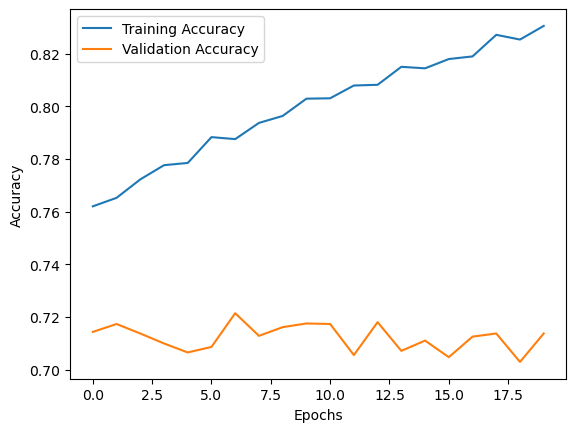

In [16]:
# Visualize Training and Validation Performance
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Make Predictions on Test Data
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


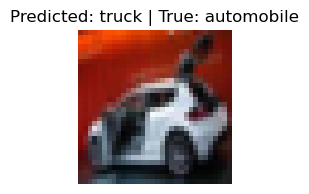

In [23]:
# Display Example Prediction
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(2, 2))
plt.imshow(x_test[6])
plt.title(f"Predicted: {class_names[tf.argmax(predictions[6])]} | True: {class_names[tf.argmax(y_test[6])]}")
plt.axis('off')
plt.show()

In [19]:
# Save the model
model.save("Image_recognition.keras")